In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
#Read CSV document with an encoding because 'UTF-8' codec can't decode (UnicodeDecodeError)

df = pd.read_csv('superstore_final_dataset.csv')
df.head()

,Row_ID,Order_ID,Order_Date,Ship_Date,Ship_Mode,Customer_ID,Customer_Name,Segment,Country,City,State,Postal_Code,Region,Product_ID,Category,Sub-Category,Product_Name,Sales
0,1,CA-2017-152156,08/11/2017,11/11/2017,Second Class,CG-12520,Claire Gute,Consumer,United States,Henderson,Kentucky,42420.0,South,FUR-BO-10001798,Furniture,Bookcases,Bush Somerset Collection Bookcase,261.9600
1,2,CA-2017-152156,08/11/2017,11/11/2017,Second Class,CG-12520,Claire Gute,Consumer,United States,Henderson,Kentucky,42420.0,South,FUR-CH-10000454,Furniture,Chairs,"Hon Deluxe Fabric Upholstered Stacking Chairs,...",731.9400
2,3,CA-2017-138688,12/06/2017,16/06/2017,Second Class,DV-13045,Darrin Van Huff,Corporate,United States,Los Angeles,California,90036.0,West,OFF-LA-10000240,Office Supplies,Labels,Self-Adhesive Address Labels for Typewriters b...,14.6200
3,4,US-2016-108966,11/10/2016,18/10/2016,Standard Class,SO-20335,Sean O'Donnell,Consumer,United States,Fort Lauderdale,Florida,33311.0,South,FUR-TA-10000577,Furniture,Tables,Bretford CR4500 Series Slim Rectangular Table,957.5775
4,5,US-2016-108966,11/10/2016,18/10/2016,Standard Class,SO-20335,Sean O'Donnell,Consumer,United States,Fort Lauderdale,Florida,33311.0,South,OFF-ST-10000760,Office Supplies,Storage,Eldon Fold 'N Roll Cart System,22368.0000


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9800 entries, 0 to 9799
Data columns (total 18 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Row_ID         9800 non-null   int64  
 1   Order_ID       9800 non-null   object 
 2   Order_Date     9800 non-null   object 
 3   Ship_Date      9800 non-null   object 
 4   Ship_Mode      9800 non-null   object 
 5   Customer_ID    9800 non-null   object 
 6   Customer_Name  9800 non-null   object 
 7   Segment        9800 non-null   object 
 8   Country        9800 non-null   object 
 9   City           9800 non-null   object 
 10  State          9800 non-null   object 
 11  Postal_Code    9789 non-null   float64
 12  Region         9800 non-null   object 
 13  Product_ID     9800 non-null   object 
 14  Category       9800 non-null   object 
 15  Sub-Category   9800 non-null   object 
 16  Product_Name   9800 non-null   object 
 17  Sales          9800 non-null   float64
dtypes: float

In [4]:
#Transform data types into corresponding ones



#Dates
df['Order_Date'] = pd.to_datetime(df['Order_Date'], format="%d/%m/%Y")
df['Ship_Date'] = pd.to_datetime(df['Ship_Date'], format="%d/%m/%Y")

#String
df['Postal_Code'] = df['Postal_Code'].astype(str)

#Int
df['Sales'] = df['Sales'].astype(float)

df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9800 entries, 0 to 9799
Data columns (total 18 columns):
 #   Column         Non-Null Count  Dtype         
---  ------         --------------  -----         
 0   Row_ID         9800 non-null   int64         
 1   Order_ID       9800 non-null   object        
 2   Order_Date     9800 non-null   datetime64[ns]
 3   Ship_Date      9800 non-null   datetime64[ns]
 4   Ship_Mode      9800 non-null   object        
 5   Customer_ID    9800 non-null   object        
 6   Customer_Name  9800 non-null   object        
 7   Segment        9800 non-null   object        
 8   Country        9800 non-null   object        
 9   City           9800 non-null   object        
 10  State          9800 non-null   object        
 11  Postal_Code    9800 non-null   object        
 12  Region         9800 non-null   object        
 13  Product_ID     9800 non-null   object        
 14  Category       9800 non-null   object        
 15  Sub-Category   9800 n

In [5]:
df['Row_ID'] = df.index

In [6]:
#Split Mastertable intro four tables following ERD

df=df.drop_duplicates().reset_index(drop=True)

Order_Dim = df[['Row_ID', 'Order_ID', 'Customer_ID', 'Product_ID', 'Sales']]
Customer_Dim = df[['Customer_ID', 'Customer_Name', 'Segment']]
Product_Dim = df[['Product_ID', 'Product_Name', 'Category', 'Sub-Category']]

Delivery_Dim = df[['Order_Date', 'Ship_Date', 'Ship_Mode']].reset_index(drop=True)
Delivery_Dim['Delivery_ID'] = Delivery_Dim.index
Delivery_Dim = Delivery_Dim[['Delivery_ID', 'Order_Date', 'Ship_Date', 'Ship_Mode']]

Destination_Dim = df[['Country', 'City', 'State', 'Postal_Code', 'Region']].reset_index(drop=True)
Destination_Dim['Destination_ID'] = Destination_Dim.index
Destination_Dim = Destination_Dim[['Destination_ID', 'Country', 'City', 'State', 'Postal_Code', 'Region']]


In [7]:
Customer_Dim.head()

,Customer_ID,Customer_Name,Segment
0,CG-12520,Claire Gute,Consumer
1,CG-12520,Claire Gute,Consumer
2,DV-13045,Darrin Van Huff,Corporate
3,SO-20335,Sean O'Donnell,Consumer
4,SO-20335,Sean O'Donnell,Consumer


In [8]:
Product_Dim.head()

,Product_ID,Product_Name,Category,Sub-Category
0,FUR-BO-10001798,Bush Somerset Collection Bookcase,Furniture,Bookcases
1,FUR-CH-10000454,"Hon Deluxe Fabric Upholstered Stacking Chairs,...",Furniture,Chairs
2,OFF-LA-10000240,Self-Adhesive Address Labels for Typewriters b...,Office Supplies,Labels
3,FUR-TA-10000577,Bretford CR4500 Series Slim Rectangular Table,Furniture,Tables
4,OFF-ST-10000760,Eldon Fold 'N Roll Cart System,Office Supplies,Storage


In [9]:
#Creating the ID relation with the other tables, ensuring that there are no redundancies. (Delivery-Destination)

Delivery_Dim_mrg = Delivery_Dim.merge(Destination_Dim, left_on ='Delivery_ID', right_on='Destination_ID')
merged_df = pd.merge(Delivery_Dim_mrg, Destination_Dim.drop_duplicates(subset=['Country', 'City', 'State', 'Postal_Code', 'Region']), on=['Country', 'City', 'State', 'Postal_Code', 'Region'], how='left')

merged_df = merged_df.rename(columns={'Destination_ID_y': 'Destination_ID'})

Delivery_DimNew = merged_df[['Delivery_ID', 'Order_Date', 'Ship_Date', 'Ship_Mode', 'Destination_ID']].reset_index(drop=True)
Destination_DimNew = merged_df[['Destination_ID', 'Country', 'City', 'State', 'Postal_Code', 'Region']].drop_duplicates().reset_index(drop=True)


In [10]:
Delivery_DimNew.head()

,Delivery_ID,Order_Date,Ship_Date,Ship_Mode,Destination_ID
0,0,2017-11-08,2017-11-11,Second Class,0
1,1,2017-11-08,2017-11-11,Second Class,0
2,2,2017-06-12,2017-06-16,Second Class,2
3,3,2016-10-11,2016-10-18,Standard Class,3
4,4,2016-10-11,2016-10-18,Standard Class,3


In [11]:
Destination_DimNew.head()

,Destination_ID,Country,City,State,Postal_Code,Region
0,0,United States,Henderson,Kentucky,42420.0,South
1,2,United States,Los Angeles,California,90036.0,West
2,3,United States,Fort Lauderdale,Florida,33311.0,South
3,5,United States,Los Angeles,California,90032.0,West
4,12,United States,Concord,North Carolina,28027.0,South


In [12]:
#Creating the ID relation with the other tables, ensuring that there are no redundancies. (Order-Delivery)

Order_Dim_mrg = Order_Dim.merge(Delivery_DimNew, left_on='Row_ID', right_on='Delivery_ID')
merged_ord = pd.merge(Order_Dim_mrg, Delivery_DimNew.drop_duplicates(subset=['Order_Date', 'Ship_Date', 'Ship_Mode', 'Destination_ID']), on=['Order_Date', 'Ship_Date', 'Ship_Mode', 'Destination_ID'], how='left')

merged_ord = merged_ord.rename(columns={'Delivery_ID_y': 'Delivery_ID'})

Order_DimNew = merged_ord[['Row_ID', 'Order_ID', 'Customer_ID', 'Product_ID', 'Delivery_ID', 'Sales']]
Delivery_DimNew =merged_ord[['Delivery_ID', 'Order_Date', 'Ship_Date', 'Ship_Mode', 'Destination_ID']]


In [13]:
Delivery_DimNew.head()

,Delivery_ID,Order_Date,Ship_Date,Ship_Mode,Destination_ID
0,0,2017-11-08,2017-11-11,Second Class,0
1,0,2017-11-08,2017-11-11,Second Class,0
2,2,2017-06-12,2017-06-16,Second Class,2
3,3,2016-10-11,2016-10-18,Standard Class,3
4,3,2016-10-11,2016-10-18,Standard Class,3


In [14]:
Order_DimNew.head()

,Row_ID,Order_ID,Customer_ID,Product_ID,Delivery_ID,Sales
0,0,CA-2017-152156,CG-12520,FUR-BO-10001798,0,261.9600
1,1,CA-2017-152156,CG-12520,FUR-CH-10000454,0,731.9400
2,2,CA-2017-138688,DV-13045,OFF-LA-10000240,2,14.6200
3,3,US-2016-108966,SO-20335,FUR-TA-10000577,3,957.5775
4,4,US-2016-108966,SO-20335,OFF-ST-10000760,3,22368.0000


In [15]:
#Clean all tables of redundancies now that all IDs are related.

Customer_Dim = Customer_Dim.drop_duplicates().reset_index(drop=True)
Product_Dim = Product_Dim.drop_duplicates().reset_index(drop=True)
Delivery_DimNew = Delivery_DimNew.drop_duplicates().reset_index(drop=True)
Destination_DimNew = Destination_DimNew.drop_duplicates().reset_index(drop=True)


In [16]:
#Save the four tables on a folder.

Order_DimNew.to_csv('Tables/order_dim.csv', header=True, index=False)
Customer_Dim.to_csv('Tables/customer_dim.csv', header=True, index=False)
Product_Dim.to_csv('Tables/product_dim.csv', header=True, index=False)
Delivery_DimNew.to_csv('Tables/delivery_dim.csv', header=True, index=False)
Destination_DimNew.to_csv('Tables/destination_dim.csv', header=True, index=False)

In [17]:
dfs= pd.read_csv('Tables/product_dim.csv')
dfs

,Product_ID,Product_Name,Category,Sub-Category
0,FUR-BO-10001798,Bush Somerset Collection Bookcase,Furniture,Bookcases
1,FUR-CH-10000454,"Hon Deluxe Fabric Upholstered Stacking Chairs,...",Furniture,Chairs
2,OFF-LA-10000240,Self-Adhesive Address Labels for Typewriters b...,Office Supplies,Labels
3,FUR-TA-10000577,Bretford CR4500 Series Slim Rectangular Table,Furniture,Tables
4,OFF-ST-10000760,Eldon Fold 'N Roll Cart System,Office Supplies,Storage
...,...,...,...,...
1888,TEC-AC-10002380,Sony 8GB Class 10 Micro SDHC R40 Memory Card,Technology,Accessories
1889,TEC-PH-10002817,RCA ViSYS 25425RE1 Corded phone,Technology,Phones
1890,TEC-MA-10003589,Cisco 8961 IP Phone Charcoal,Technology,Machines
1891,OFF-AP-10003099,"Eureka Hand Vacuum, Bagless",Office Supplies,Appliances


In [18]:
#Customer_Dim #-- 793 rows x 3 columns
#Product_Dim #-- 1894 rows x 4 columns
#Delivery_DimNew #-- 4906 rows x 5 columns
#Destination_DimNew #-- 628 rows x 6 columns
#Order_DimNew  #-- 9800 rows x 6 columns

Text(0.5, 1.0, 'Top 20 States by Sales')

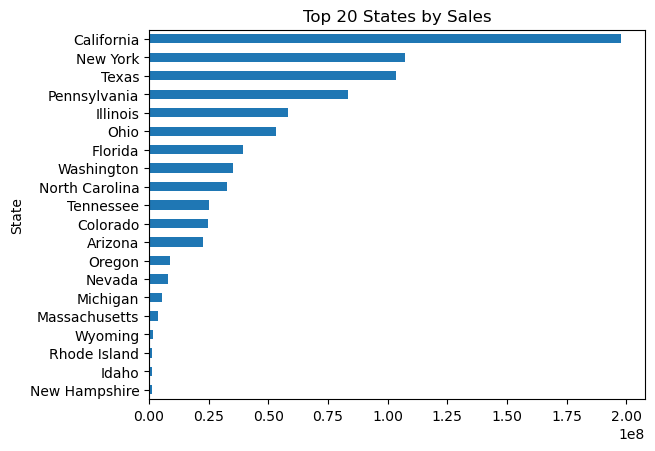

In [19]:
df.groupby('State')['Sales'].sum().sort_values(ascending=True).tail(20).plot.barh()
plt.title('Top 20 States by Sales')

Text(0.5, 1.0, 'Top 20 Cities by Sales')

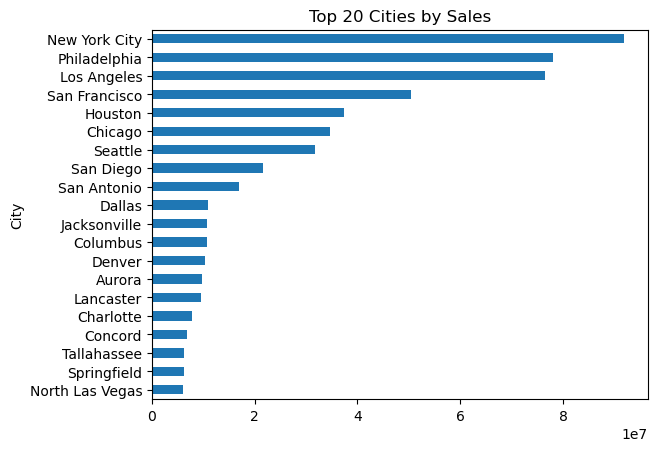

In [20]:
df.groupby('City')['Sales'].sum().sort_values(ascending=True).tail(20).plot.barh()
plt.title('Top 20 Cities by Sales')

Text(0.5, 1.0, 'Composition of Category for Sales')

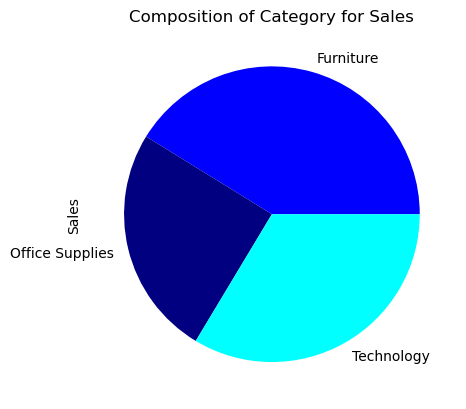

In [21]:
colors= ['blue', 'navy', 'cyan']

df.groupby('Category')['Sales'].sum().plot.pie(colors=colors)
plt.title("Composition of Category for Sales")

In [64]:
#Order_DimNew.info()
#Customer_Dim.info()
#Product_Dim.info()
#Delivery_DimNew.info()
#Destination_DimNew.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 628 entries, 0 to 627
Data columns (total 6 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   Destination_ID  628 non-null    int64 
 1   Country         628 non-null    object
 2   City            628 non-null    object
 3   State           628 non-null    object
 4   Postal_Code     628 non-null    object
 5   Region          628 non-null    object
dtypes: int64(1), object(5)
memory usage: 29.6+ KB
